In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils import validation
import matplotlib.pyplot as plt
import keras
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import KFold
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(2)

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Functions

In [4]:
def train_model(model,train_images, train_labels, validation_images,validation_labels, model_name):
  """
  train_model uses a validation and training set for training the correspondant model and
  saves the best model weights into a file
  """

  # Show how the network is generated
  tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

  # compile the model 
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  
  model_name = '/content/drive/My Drive/Computer_Vision/Assignment_4/' + model_name
  
  # define a checkpoint to save the best model weights based on validation accuracy
  checkpoint = ModelCheckpoint(model_name, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

  history = model.fit(train_images, train_labels, epochs=15, validation_data=(validation_images,validation_labels), callbacks=[checkpoint])


  # Plot the training and validation loss values
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

In [5]:
def train_model_all(model, train_images, train_labels, model_name):
  """
  train_model_all uses only a training set for training the correspondant model and
  saves the best model weights into a file
  """
  # Show how the network is generated
  tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

  # compile the model 
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  model_name = '/content/drive/My Drive/Computer_Vision/Assignment_4/' + model_name
  
  # define a checkpoint to save the best model weights based on validation accuracy
  checkpoint = ModelCheckpoint(model_name, monitor='loss', save_best_only=True, mode='min', verbose=1)

  history = model.fit(train_images, train_labels, epochs=15, callbacks=[checkpoint])



In [6]:
def train_model_LR(model,train_images, train_labels, validation_images,validation_labels, model_name):
  """
  train_model_LR uses a validation and training set for training the baseline model variation n4 which is
  a static learning rat with a momentum instead of the adam optimizer. Also it saves the 
  best model weights into a file.
  """
  # Show how the network is generated
  tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

  # compile the model 
  opt = SGD(lr=0.01, momentum=0.9) # stable learning rate with momentum
  model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  
  model_name = '/content/drive/My Drive/Computer_Vision/Assignment_4/' + model_name
  
  # define a checkpoint to save the best model weights based on validation accuracy
  checkpoint = ModelCheckpoint(model_name, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

  history = model.fit(train_images, train_labels, epochs=15, validation_data=(validation_images,validation_labels), callbacks=[checkpoint])

  # Plot the training and validation loss values
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

## Data definition

In [7]:
# get the data-set
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images_all, train_labels_all), (test_images, test_labels) = fashion_mnist.load_data()

# split the train dataset into train and test sets
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_all, train_labels_all, test_size=0.2, random_state=42)

# normalize the images 
train_images_all = train_images_all / 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = validation_images / 255.0

# Define the class names 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


## Mandatory assignment

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

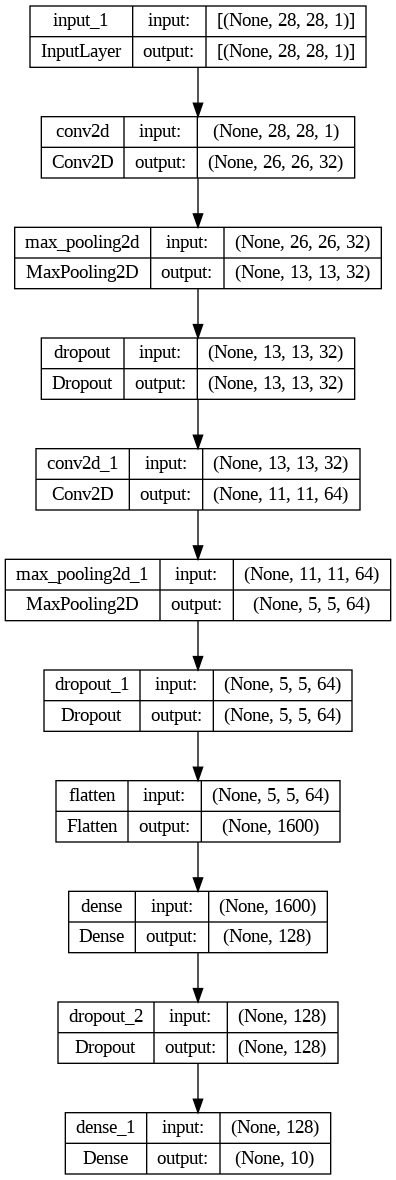

In [8]:
# model baseline
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1488/1500 [============================>.] - ETA: 0s - loss: 0.5863 - accuracy: 0.7837
Epoch 1: val_accuracy improved from -inf to 0.86417, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/modelbaseline_weights.h5
1500/1500 [==============================] - 19s 5ms/step - loss: 0.5852 - accuracy: 0.7841 - val_loss: 0.3822 - val_accuracy: 0.8642
Epoch 2/15
1492/1500 [============================>.] - ETA: 0s - loss: 0.3937 - accuracy: 0.8570
Epoch 2: val_accuracy improved from 0.86417 to 0.88592, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/modelbaseline_weights.h5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3934 - accuracy: 0.8571 - val_loss: 0.3171 - val_accuracy: 0.8859
Epoch 3/15
1497/1500 [============================>.] - ETA: 0s - loss: 0.3413 - accuracy: 0.8747
Epoch 3: val_accuracy improved from 0.88592 to 0.89058, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/modelbaseline_weights.h5
150

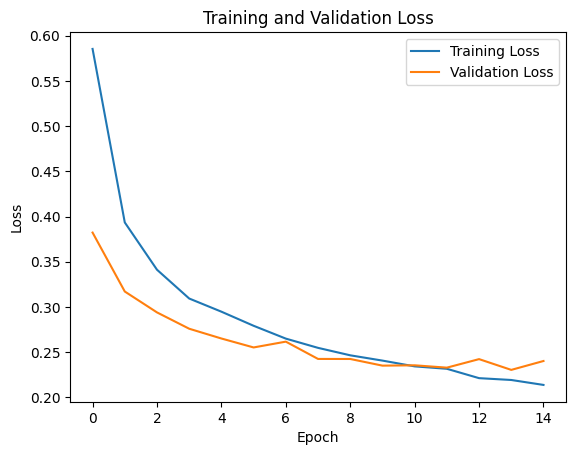

In [9]:
train_model(model, train_images, train_labels, validation_images,validation_labels, 'modelbaseline_weights.h5')

### Four baseline model variants

Epoch 1/15
1495/1500 [============================>.] - ETA: 0s - loss: 0.6332 - accuracy: 0.7670
Epoch 1: val_accuracy improved from -inf to 0.85175, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/modelkernel_weights.h5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.6327 - accuracy: 0.7672 - val_loss: 0.4117 - val_accuracy: 0.8518
Epoch 2/15
1490/1500 [============================>.] - ETA: 0s - loss: 0.4303 - accuracy: 0.8431
Epoch 2: val_accuracy improved from 0.85175 to 0.86975, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/modelkernel_weights.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4303 - accuracy: 0.8431 - val_loss: 0.3681 - val_accuracy: 0.8698
Epoch 3/15
1487/1500 [============================>.] - ETA: 0s - loss: 0.3769 - accuracy: 0.8616
Epoch 3: val_accuracy improved from 0.86975 to 0.87242, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/modelkernel_weights.h5

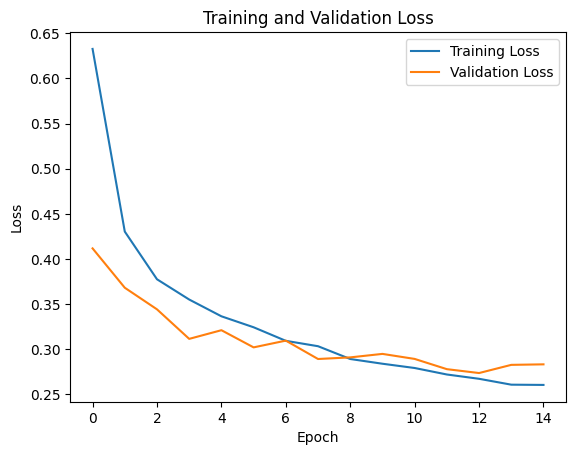

In [10]:
# model 1: kernel size changed
model_kernel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(7, 7), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

train_model(model_kernel, train_images, train_labels, validation_images,validation_labels, 'modelkernel_weights.h5')

Epoch 1/15
1490/1500 [============================>.] - ETA: 0s - loss: 0.5020 - accuracy: 0.8202
Epoch 1: val_accuracy improved from -inf to 0.87700, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_BN_weights.h5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5017 - accuracy: 0.8203 - val_loss: 0.3339 - val_accuracy: 0.8770
Epoch 2/15
1495/1500 [============================>.] - ETA: 0s - loss: 0.3709 - accuracy: 0.8650
Epoch 2: val_accuracy did not improve from 0.87700
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3706 - accuracy: 0.8651 - val_loss: 0.3359 - val_accuracy: 0.8730
Epoch 3/15
1499/1500 [============================>.] - ETA: 0s - loss: 0.3340 - accuracy: 0.8758
Epoch 3: val_accuracy improved from 0.87700 to 0.89567, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_BN_weights.h5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3339 - accuracy: 0.8758 - val_loss

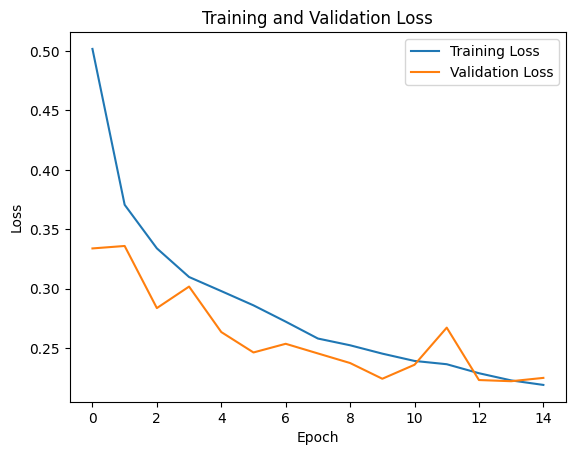

In [41]:
# model 2: batch normalization
model_norm = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
]) 

train_model(model_norm,train_images, train_labels, validation_images,validation_labels, 'model_BN_weights.h5')

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1499/1500 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.7294
Epoch 1: val_accuracy improved from -inf to 0.81842, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_LR_weights.h5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7109 - accuracy: 0.7295 - val_loss: 0.4714 - val_accuracy: 0.8184
Epoch 2/15
1489/1500 [============================>.] - ETA: 0s - loss: 0.4712 - accuracy: 0.8235
Epoch 2: val_accuracy improved from 0.81842 to 0.86067, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_LR_weights.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4709 - accuracy: 0.8239 - val_loss: 0.3733 - val_accuracy: 0.8607
Epoch 3/15
1486/1500 [============================>.] - ETA: 0s - loss: 0.4063 - accuracy: 0.8497
Epoch 3: val_accuracy improved from 0.86067 to 0.87375, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_LR_weights.h5
1500/150

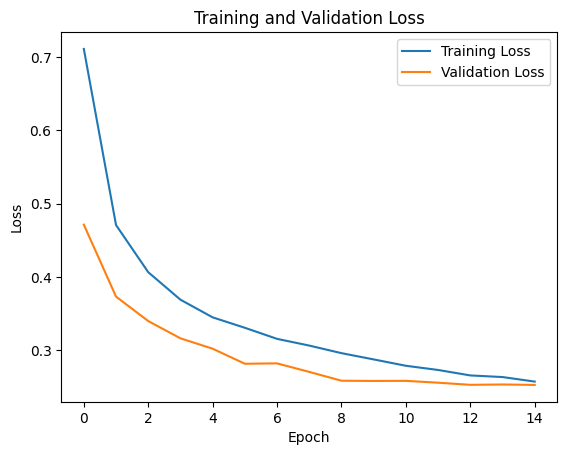

In [12]:
# model 3: learing rate 
model_LR = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

train_model_LR(model_LR, train_images, train_labels, validation_images,validation_labels, 'model_LR_weights.h5')

Epoch 1/15
1494/1500 [============================>.] - ETA: 0s - loss: 1.0258 - accuracy: 0.6160
Epoch 1: val_accuracy improved from -inf to 0.75825, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_sigmoid_weights.h5
1500/1500 [==============================] - 8s 4ms/step - loss: 1.0246 - accuracy: 0.6163 - val_loss: 0.6109 - val_accuracy: 0.7582
Epoch 2/15
1492/1500 [============================>.] - ETA: 0s - loss: 0.6163 - accuracy: 0.7632
Epoch 2: val_accuracy improved from 0.75825 to 0.79875, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_sigmoid_weights.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6163 - accuracy: 0.7632 - val_loss: 0.5181 - val_accuracy: 0.7987
Epoch 3/15
1494/1500 [============================>.] - ETA: 0s - loss: 0.5407 - accuracy: 0.7916
Epoch 3: val_accuracy improved from 0.79875 to 0.81500, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/model_sigmoid_weig

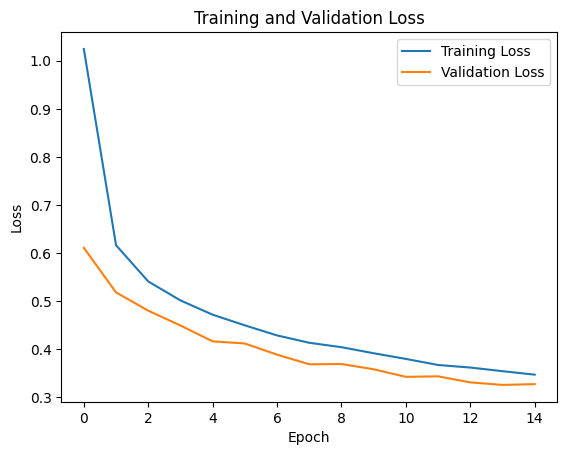

In [13]:
# model 4: sigmoid
model_sigmoid = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])


train_model(model_sigmoid,train_images, train_labels, validation_images,validation_labels, 'model_sigmoid_weights.h5')

### Test the two best models.

In [14]:
# Train again the best models without a validation set, thus using all training data

# model baseline
best_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

train_model_all(best_model, train_images_all, train_labels_all, 'best_BaseModel_weights.h5')

Epoch 1/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7954
Epoch 1: loss improved from inf to 0.55528, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/best_BaseModel_weights.h5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5553 - accuracy: 0.7955
Epoch 2/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.3728 - accuracy: 0.8633
Epoch 2: loss improved from 0.55528 to 0.37262, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/best_BaseModel_weights.h5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3726 - accuracy: 0.8634
Epoch 3/15
1868/1875 [============================>.] - ETA: 0s - loss: 0.3228 - accuracy: 0.8820
Epoch 3: loss improved from 0.37262 to 0.32300, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/best_BaseModel_weights.h5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3230 - accuracy: 0.8820
Epoch 4/

In [15]:
best_model_norm = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
]) 

train_model_all(best_model_norm, train_images_all, train_labels_all,'best_modelBN_weights.h5')

Epoch 1/15
1868/1875 [============================>.] - ETA: 0s - loss: 0.4931 - accuracy: 0.8232
Epoch 1: loss improved from inf to 0.49274, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/best_modelBN_weights.h5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4927 - accuracy: 0.8233
Epoch 2/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8692
Epoch 2: loss improved from 0.49274 to 0.36028, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/best_modelBN_weights.h5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3603 - accuracy: 0.8693
Epoch 3/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.3214 - accuracy: 0.8833
Epoch 3: loss improved from 0.36028 to 0.32139, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/best_modelBN_weights.h5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3214 - accuracy: 0.8832
Epoch 4/15
1

In [16]:
test_loss_baseline, test_acc_baseline = best_model.evaluate(test_images,  test_labels, verbose=2)
test_loss_norm, test_acc_norm = best_model_norm.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2276 - accuracy: 0.9156 - 853ms/epoch - 3ms/step
313/313 - 1s - loss: 0.2397 - accuracy: 0.9084 - 1s/epoch - 4ms/step


In [17]:
print('Test accuracy Kernel:', test_acc_baseline)
print('\nTest accuracy Batch normalization:', test_acc_norm)

Test accuracy Kernel: 0.9156000018119812

Test accuracy Batch normalization: 0.9083999991416931


In [18]:
print('\nModel Baseline:')
preds_b = best_model.predict(test_images)
preds_b = np.argmax(preds_b, axis=1)

print(classification_report(test_labels, preds_b))

print('\nModel Batch Normalization:')

preds_n = best_model_norm.predict(test_images)
preds_n = np.argmax(preds_n, axis=1)

print(classification_report(test_labels, preds_n))


Model Kernel Size:
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1000
           1       1.00      0.99      0.99      1000
           2       0.86      0.88      0.87      1000
           3       0.91      0.94      0.92      1000
           4       0.87      0.86      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.76      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Model Batch Normalization:
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93     

## Choice Tasks


### Choice 2: Learning rate

In [19]:
# Making use of the best model on the test set: baseline model, implement choice task 2

# model baseline
best_model_LR = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

def step_decay(epoch):
    # step_decay takes an initial learning rate value and drops its value
    # by 1/2 for every 5 epochs
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 5
    lr = initial_lr * drop**(epoch//epochs_drop)
    return lr

def train_model_LR2(model, train_images, train_labels, model_name):
    # train_model_LR2 takes into account the LR variation with LearningRateScheduler
    
    # Show how the network is generated
    tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

    # compile the model 
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model_name = '/content/drive/My Drive/Computer_Vision/Assignment_4/' + model_name

    # define a checkpoint to save the best model weights based on validation accuracy
    checkpoint = ModelCheckpoint(model_name, monitor='loss', save_best_only=True, mode='min', verbose=1)

    # define a learning rate scheduler
    lr_scheduler = LearningRateScheduler(step_decay)

    history = model.fit(train_images, train_labels, epochs=15, callbacks=[checkpoint, lr_scheduler])

In [20]:
train_model_LR2(best_model_LR, train_images_all, train_labels_all, 'basemodel_LR.h5')

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1873/1875 [============================>.] - ETA: 0s - loss: 0.5416 - accuracy: 0.8015

1875/1875 [==============================] - 8s 4ms/step - loss: 0.5413 - accuracy: 0.8016 - lr: 0.0010
Epoch 2/15
1867/1875 [============================>.] - ETA: 0s - loss: 0.3677 - accuracy: 0.8658

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3676 - accuracy: 0.8658 - lr: 0.0010
Epoch 3/15
1873/1875 [============================>.] - ETA: 0s - loss: 0.3224 - accuracy: 0.8820

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3225 - accuracy: 0.8820 - lr: 0.0010
Epoch 4/15
1862/1875 [============================>.] - ETA: 0s - loss: 0.2993 - accuracy: 0.8889

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2994 - accuracy: 0.8888 - lr: 0.0010
Epoch 5/15
1862/1875 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8952

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - accuracy: 0.8952 - lr: 0.0010
Epoch 6/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.2530 - accuracy: 0.9071

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2530 - accuracy: 0.9071 - lr: 5.0000e-04
Epoch 7/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.2424 - accuracy: 0.9099

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2422 - accuracy: 0.9100 - lr: 5.0000e-04
Epoch 8/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9142

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2335 - accuracy: 0.9142 - lr: 5.0000e-04
Epoch 9/15
1868/1875 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9141

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2287 - accuracy: 0.9141 - lr: 5.0000e-04
Epoch 10/15
1871/1875 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9164

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2234 - accuracy: 0.9164 - lr: 5.0000e-04
Epoch 11/15
1862/1875 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9223

1875/1875 [==============================] - 8s 4ms/step - loss: 0.2086 - accuracy: 0.9221 - lr: 2.5000e-04
Epoch 12/15
1869/1875 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9234

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2030 - accuracy: 0.9234 - lr: 2.5000e-04
Epoch 13/15
1874/1875 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.9242

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2008 - accuracy: 0.9242 - lr: 2.5000e-04
Epoch 14/15
1862/1875 [============================>.] - ETA: 0s - loss: 0.1965 - accuracy: 0.9262

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1962 - accuracy: 0.9263 - lr: 2.5000e-04
Epoch 15/15
1867/1875 [============================>.] - ETA: 0s - loss: 0.1947 - accuracy: 0.9262

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1947 - accuracy: 0.9262 - lr: 2.5000e-04


In [21]:
test_loss_LR, test_acc_LR= best_model_LR.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2222 - accuracy: 0.9180 - 796ms/epoch - 3ms/step


In [22]:
print('Test accuracy Kernel LR:', test_acc_LR)

Test accuracy Kernel LR: 0.9179999828338623


In [23]:
print('\n Best Model Baseline Choice Task 2 (Learning Rate):')
preds_lr = best_model_LR.predict(test_images)
preds_lr = np.argmax(preds_lr, axis=1)

print(classification_report(test_labels, preds_lr))


 Best Model Baseline Choice Task 2 (Learning Rate):
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.89      0.88      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.88      0.88      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.76      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### Choice 3: k-fold

In [26]:
# Make use of k-fold to train the model
# model baseline
best_model_LR_kfold = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

def train_model_LR_kfold(model, images, labels, model_name):
    # trains making use of k-fold and also the LR choice task 2
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    fold_no = 1

    for train_idx, val_idx in kfold.split(images):
        train_images, train_labels = images[train_idx], labels[train_idx]

        val_images, val_labels = images[val_idx], labels[val_idx]
        
        # compile the model 
        model.compile(optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

        model_name = f'/content/drive/My Drive/Computer_Vision/Assignment_4/{model_name}_fold_{fold_no}'

        # define a checkpoint to save the best model weights based on validation accuracy
        checkpoint = ModelCheckpoint(model_name, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

        # define a learning rate scheduler
        lr_scheduler = LearningRateScheduler(step_decay)

        history = model.fit(train_images, train_labels, epochs=15, callbacks=[checkpoint, lr_scheduler], validation_data=(val_images, val_labels), verbose=2)

        fold_no += 1

Non-augented data

In [27]:
train_model_LR_kfold(best_model_LR_kfold, train_images_all, train_labels_all, 'basemodel_LR_kfold.h5')

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.84883, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 9s - loss: 0.5758 - accuracy: 0.7884 - val_loss: 0.3967 - val_accuracy: 0.8488 - lr: 0.0010 - 9s/epoch - 6ms/step
Epoch 2/15

Epoch 2: val_accuracy improved from 0.84883 to 0.88308, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 8s - loss: 0.3908 - accuracy: 0.8553 - val_loss: 0.3186 - val_accuracy: 0.8831 - lr: 0.0010 - 8s/epoch - 5ms/step
Epoch 3/15

Epoch 3: val_accuracy improved from 0.88308 to 0.89092, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 7s - loss: 0.3430 - accuracy: 0.8749 - val_loss: 0.3007 - val_accuracy: 0.8909 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 4/15

Epoch 4: val_accuracy improved from 0.89092 to 0.89792, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 8s - loss: 0.3138 - accuracy: 0.8845 - val_loss: 0.2712 - val_accuracy: 0.8979 - lr: 0.0010 - 8s/epoch - 5ms/step
Epoch 5/15

Epoch 5: val_accuracy improved from 0.89792 to 0.90292, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 7s - loss: 0.2899 - accuracy: 0.8920 - val_loss: 0.2610 - val_accuracy: 0.9029 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 6/15

Epoch 6: val_accuracy improved from 0.90292 to 0.90808, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 7s - loss: 0.2602 - accuracy: 0.9037 - val_loss: 0.2451 - val_accuracy: 0.9081 - lr: 5.0000e-04 - 7s/epoch - 5ms/step
Epoch 7/15

Epoch 7: val_accuracy improved from 0.90808 to 0.90892, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 10s - loss: 0.2495 - accuracy: 0.9068 - val_loss: 0.2443 - val_accuracy: 0.9089 - lr: 5.0000e-04 - 10s/epoch - 7ms/step
Epoch 8/15

Epoch 8: val_accuracy improved from 0.90892 to 0.91200, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 7s - loss: 0.2420 - accuracy: 0.9104 - val_loss: 0.2414 - val_accuracy: 0.9120 - lr: 5.0000e-04 - 7s/epoch - 5ms/step
Epoch 9/15

Epoch 9: val_accuracy did not improve from 0.91200
1500/1500 - 7s - loss: 0.2304 - accuracy: 0.9158 - val_loss: 0.2504 - val_accuracy: 0.9068 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 10/15

Epoch 10: val_accuracy improved from 0.91200 to 0.91475, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 6s - loss: 0.2273 - accuracy: 0.9140 - val_loss: 0.2311 - val_accuracy: 0.9147 - lr: 5.0000e-04 - 6s/epoch - 4ms/step
Epoch 11/15

Epoch 11: val_accuracy improved from 0.91475 to 0.91925, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 8s - loss: 0.2091 - accuracy: 0.9210 - val_loss: 0.2215 - val_accuracy: 0.9193 - lr: 2.5000e-04 - 8s/epoch - 5ms/step
Epoch 12/15

Epoch 12: val_accuracy improved from 0.91925 to 0.92042, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 6s - loss: 0.2061 - accuracy: 0.9228 - val_loss: 0.2176 - val_accuracy: 0.9204 - lr: 2.5000e-04 - 6s/epoch - 4ms/step
Epoch 13/15

Epoch 13: val_accuracy improved from 0.92042 to 0.92058, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 7s - loss: 0.2027 - accuracy: 0.9243 - val_loss: 0.2182 - val_accuracy: 0.9206 - lr: 2.5000e-04 - 7s/epoch - 5ms/step
Epoch 14/15

Epoch 14: val_accuracy did not improve from 0.92058
1500/1500 - 6s - loss: 0.1980 - accuracy: 0.9267 - val_loss: 0.2156 - val_accuracy: 0.9186 - lr: 2.5000e-04 - 6s/epoch - 4ms/step
Epoch 15/15

Epoch 15: val_accuracy improved from 0.92058 to 0.92208, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1


1500/1500 - 8s - loss: 0.1946 - accuracy: 0.9265 - val_loss: 0.2161 - val_accuracy: 0.9221 - lr: 2.5000e-04 - 8s/epoch - 5ms/step
Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.93342, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2


1500/1500 - 9s - loss: 0.2451 - accuracy: 0.9099 - val_loss: 0.1809 - val_accuracy: 0.9334 - lr: 0.0010 - 9s/epoch - 6ms/step
Epoch 2/15

Epoch 2: val_accuracy improved from 0.93342 to 0.93408, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2


1500/1500 - 6s - loss: 0.2356 - accuracy: 0.9122 - val_loss: 0.1779 - val_accuracy: 0.9341 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.93408
1500/1500 - 6s - loss: 0.2300 - accuracy: 0.9141 - val_loss: 0.1900 - val_accuracy: 0.9312 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.93408
1500/1500 - 5s - loss: 0.2243 - accuracy: 0.9163 - val_loss: 0.1924 - val_accuracy: 0.9270 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.93408
1500/1500 - 5s - loss: 0.2177 - accuracy: 0.9188 - val_loss: 0.1975 - val_accuracy: 0.9240 - lr: 0.0010 - 5s/epoch - 4ms/step
Epoch 6/15

Epoch 6: val_accuracy did not improve from 0.93408
1500/1500 - 7s - loss: 0.1941 - accuracy: 0.9260 - val_loss: 0.1845 - val_accuracy: 0.9294 - lr: 5.0000e-04 - 7s/epoch - 4ms/step
Epoch 7/15

Epoch 7: val_accuracy did not improve from 0.93408
1500/1500 - 5s - loss: 0.1872 - accuracy: 0.9293 - 

1500/1500 - 8s - loss: 0.1766 - accuracy: 0.9330 - val_loss: 0.1735 - val_accuracy: 0.9352 - lr: 5.0000e-04 - 8s/epoch - 5ms/step
Epoch 10/15

Epoch 10: val_accuracy did not improve from 0.93517
1500/1500 - 6s - loss: 0.1784 - accuracy: 0.9324 - val_loss: 0.1769 - val_accuracy: 0.9348 - lr: 5.0000e-04 - 6s/epoch - 4ms/step
Epoch 11/15

Epoch 11: val_accuracy improved from 0.93517 to 0.93792, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2


1500/1500 - 7s - loss: 0.1630 - accuracy: 0.9382 - val_loss: 0.1683 - val_accuracy: 0.9379 - lr: 2.5000e-04 - 7s/epoch - 5ms/step
Epoch 12/15

Epoch 12: val_accuracy improved from 0.93792 to 0.93808, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2


1500/1500 - 8s - loss: 0.1579 - accuracy: 0.9406 - val_loss: 0.1670 - val_accuracy: 0.9381 - lr: 2.5000e-04 - 8s/epoch - 5ms/step
Epoch 13/15

Epoch 13: val_accuracy did not improve from 0.93808
1500/1500 - 5s - loss: 0.1574 - accuracy: 0.9398 - val_loss: 0.1669 - val_accuracy: 0.9370 - lr: 2.5000e-04 - 5s/epoch - 3ms/step
Epoch 14/15

Epoch 14: val_accuracy improved from 0.93808 to 0.93825, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2


1500/1500 - 8s - loss: 0.1565 - accuracy: 0.9406 - val_loss: 0.1669 - val_accuracy: 0.9383 - lr: 2.5000e-04 - 8s/epoch - 5ms/step
Epoch 15/15

Epoch 15: val_accuracy did not improve from 0.93825
1500/1500 - 5s - loss: 0.1537 - accuracy: 0.9407 - val_loss: 0.1806 - val_accuracy: 0.9312 - lr: 2.5000e-04 - 5s/epoch - 3ms/step
Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.95383, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2_fold_3


1500/1500 - 9s - loss: 0.2083 - accuracy: 0.9227 - val_loss: 0.1260 - val_accuracy: 0.9538 - lr: 0.0010 - 9s/epoch - 6ms/step
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.95383
1500/1500 - 5s - loss: 0.2028 - accuracy: 0.9244 - val_loss: 0.1332 - val_accuracy: 0.9500 - lr: 0.0010 - 5s/epoch - 3ms/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.95383
1500/1500 - 6s - loss: 0.2003 - accuracy: 0.9242 - val_loss: 0.1394 - val_accuracy: 0.9498 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.95383
1500/1500 - 6s - loss: 0.1948 - accuracy: 0.9259 - val_loss: 0.1448 - val_accuracy: 0.9466 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.95383
1500/1500 - 7s - loss: 0.1952 - accuracy: 0.9260 - val_loss: 0.1513 - val_accuracy: 0.9430 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 6/15

Epoch 6: val_accuracy did not improve from 0.95383
1500/1500 - 6s - loss: 0.1693 - accuracy: 0.9355 - val_

1500/1500 - 7s - loss: 0.1398 - accuracy: 0.9459 - val_loss: 0.1219 - val_accuracy: 0.9542 - lr: 2.5000e-04 - 7s/epoch - 5ms/step
Epoch 13/15

Epoch 13: val_accuracy did not improve from 0.95417
1500/1500 - 6s - loss: 0.1372 - accuracy: 0.9474 - val_loss: 0.1232 - val_accuracy: 0.9528 - lr: 2.5000e-04 - 6s/epoch - 4ms/step
Epoch 14/15

Epoch 14: val_accuracy improved from 0.95417 to 0.95592, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2_fold_3


1500/1500 - 8s - loss: 0.1375 - accuracy: 0.9470 - val_loss: 0.1200 - val_accuracy: 0.9559 - lr: 2.5000e-04 - 8s/epoch - 5ms/step
Epoch 15/15

Epoch 15: val_accuracy did not improve from 0.95592
1500/1500 - 6s - loss: 0.1363 - accuracy: 0.9478 - val_loss: 0.1221 - val_accuracy: 0.9528 - lr: 2.5000e-04 - 6s/epoch - 4ms/step
Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.96517, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2_fold_3_fold_4


1500/1500 - 10s - loss: 0.1854 - accuracy: 0.9309 - val_loss: 0.0966 - val_accuracy: 0.9652 - lr: 0.0010 - 10s/epoch - 6ms/step
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.96517
1500/1500 - 6s - loss: 0.1797 - accuracy: 0.9318 - val_loss: 0.1229 - val_accuracy: 0.9545 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.96517
1500/1500 - 6s - loss: 0.1806 - accuracy: 0.9321 - val_loss: 0.1152 - val_accuracy: 0.9619 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.96517
1500/1500 - 6s - loss: 0.1745 - accuracy: 0.9327 - val_loss: 0.1191 - val_accuracy: 0.9562 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.96517
1500/1500 - 6s - loss: 0.1767 - accuracy: 0.9330 - val_loss: 0.1176 - val_accuracy: 0.9563 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 6/15

Epoch 6: val_accuracy did not improve from 0.96517
1500/1500 - 6s - loss: 0.1523 - accuracy: 0.9424 - va

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



Epoch 1: val_accuracy improved from -inf to 0.96700, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2_fold_3_fold_4_fold_5


1500/1500 - 9s - loss: 0.1706 - accuracy: 0.9365 - val_loss: 0.0885 - val_accuracy: 0.9670 - lr: 0.0010 - 9s/epoch - 6ms/step
Epoch 2/15

Epoch 2: val_accuracy improved from 0.96700 to 0.97033, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_LR_kfold.h5_fold_1_fold_2_fold_3_fold_4_fold_5


1500/1500 - 7s - loss: 0.1746 - accuracy: 0.9327 - val_loss: 0.0857 - val_accuracy: 0.9703 - lr: 0.0010 - 7s/epoch - 5ms/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.97033
1500/1500 - 6s - loss: 0.1711 - accuracy: 0.9349 - val_loss: 0.0959 - val_accuracy: 0.9679 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.97033
1500/1500 - 6s - loss: 0.1655 - accuracy: 0.9381 - val_loss: 0.0895 - val_accuracy: 0.9674 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.97033
1500/1500 - 6s - loss: 0.1633 - accuracy: 0.9371 - val_loss: 0.0987 - val_accuracy: 0.9623 - lr: 0.0010 - 6s/epoch - 4ms/step
Epoch 6/15

Epoch 6: val_accuracy did not improve from 0.97033
1500/1500 - 5s - loss: 0.1443 - accuracy: 0.9447 - val_loss: 0.0884 - val_accuracy: 0.9669 - lr: 5.0000e-04 - 5s/epoch - 4ms/step
Epoch 7/15

Epoch 7: val_accuracy did not improve from 0.97033
1500/1500 - 7s - loss: 0.1377 - accuracy: 0.9471 - 

1500/1500 - 8s - loss: 0.1248 - accuracy: 0.9525 - val_loss: 0.0825 - val_accuracy: 0.9707 - lr: 2.5000e-04 - 8s/epoch - 5ms/step
Epoch 12/15

Epoch 12: val_accuracy did not improve from 0.97067
1500/1500 - 5s - loss: 0.1220 - accuracy: 0.9542 - val_loss: 0.0851 - val_accuracy: 0.9684 - lr: 2.5000e-04 - 5s/epoch - 4ms/step
Epoch 13/15

Epoch 13: val_accuracy did not improve from 0.97067
1500/1500 - 6s - loss: 0.1184 - accuracy: 0.9546 - val_loss: 0.0834 - val_accuracy: 0.9699 - lr: 2.5000e-04 - 6s/epoch - 4ms/step
Epoch 14/15

Epoch 14: val_accuracy did not improve from 0.97067
1500/1500 - 6s - loss: 0.1169 - accuracy: 0.9548 - val_loss: 0.0825 - val_accuracy: 0.9703 - lr: 2.5000e-04 - 6s/epoch - 4ms/step
Epoch 15/15

Epoch 15: val_accuracy improved from 0.97067 to 0.97083, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/Assignment_4//content/drive/My Drive/Computer_Vision/

1500/1500 - 7s - loss: 0.1173 - accuracy: 0.9548 - val_loss: 0.0820 - val_accuracy: 0.9708 - lr: 2.5000e-04 - 7s/epoch - 5ms/step


In [28]:
test_loss_model_kfold, test_acc_model_kfold = best_model_LR_kfold.evaluate(test_images,  test_labels, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.2423 - accuracy: 0.9259 - 1s/epoch - 4ms/step


In [29]:
print('\nTest accuracy K-fold LR:', test_acc_model_kfold)


Test accuracy K-fold LR: 0.9258999824523926


In [30]:
print('\n Best Model Baseline Choice Task 2 (Learning Rate):')
preds_kf = best_model_LR_kfold.predict(test_images)
preds_kf = np.argmax(preds_kf, axis=1)

print(classification_report(test_labels, preds_kf))


 Best Model Baseline Choice Task 2 (Learning Rate):
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.90      0.88      1000
           3       0.91      0.94      0.93      1000
           4       0.91      0.87      0.89      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.78      0.78      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### Choice 5: Data Augmentation

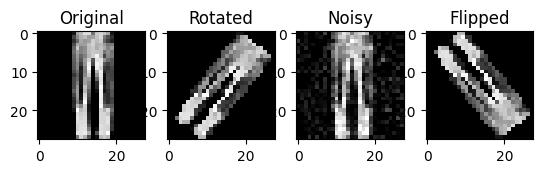

In [31]:
import numpy as np
from PIL import Image
from skimage.util import random_noise

def augment_images(train_images, train_labels):
    """
    augment_images implements data augmentation on the training set making use of rotation, 
    translation and adding gaussian noise to the images
    """
    count = 0
    augmented_images = []
    augmented_labels = []
    
    for i in range(len(train_images)):
        train_image_show=train_images[i]

        # Rotate the image
        angle = np.random.randint(0, 360)
        img = Image.fromarray(train_images[i])
        img = img.rotate(angle)
        rotated_img = np.array(img)
        augmented_images.append(rotated_img)
        augmented_labels.append(train_labels[i])
        
        # Flip the image
        flip = np.random.choice(['horizontal', 'vertical'])
        if flip == 'horizontal':
            flipped_img = np.fliplr(rotated_img)
        else:
            flipped_img = np.flipud(rotated_img)
        augmented_images.append(flipped_img)
        augmented_labels.append(train_labels[i])

        # Add random noise to the image
        noise_type = 'gaussian'
        mean = 0
        var = 0.01
        noisy_img = random_noise(train_images[i], mode=noise_type, mean=mean, var=var)
        augmented_images.append(noisy_img)
        augmented_labels.append(train_labels[i])
    
    # Append the augmented images and labels to the original dataset
    train_images = np.concatenate((train_images, augmented_images))
    train_labels = np.concatenate((train_labels, augmented_labels))

    plt.subplot(1, 4, 3)
    plt.imshow(noisy_img,cmap='gray')
    plt.title('Noisy')
    plt.subplot(1,4,2)
    plt.imshow(rotated_img,cmap='gray')
    plt.title('Rotated')
    plt.subplot(1,4,4)
    plt.imshow(flipped_img,cmap='gray')
    plt.title('Flipped')
    plt.subplot(1,4,1)
    plt.imshow(train_image_show,cmap='gray')
    plt.title('Original')
      
    return train_images, train_labels

train_images_augmented, train_labels_augmented = augment_images(train_images, train_labels)

Augmented data

In [32]:
# baseline model for augmented data training
best_model_augmented = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (28, 28, 1)), 
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
train_model_all(best_model_augmented, train_images_augmented, train_labels_augmented, 'basemodel_augmented.h5')

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5995/6000 [============================>.] - ETA: 0s - loss: 0.7828 - accuracy: 0.7119
Epoch 1: loss improved from inf to 0.78260, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_augmented.h5
6000/6000 [==============================] - 27s 4ms/step - loss: 0.7826 - accuracy: 0.7120
Epoch 2/15
6000/6000 [==============================] - ETA: 0s - loss: 0.5920 - accuracy: 0.7826
Epoch 2: loss improved from 0.78260 to 0.59196, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_augmented.h5
6000/6000 [==============================] - 26s 4ms/step - loss: 0.5920 - accuracy: 0.7826
Epoch 3/15
5999/6000 [============================>.] - ETA: 0s - loss: 0.5437 - accuracy: 0.8000
Epoch 3: loss improved from 0.59196 to 0.54373, saving model to /content/drive/My Drive/Computer_Vision/Assignment_4/basemodel_augmented.h5
6000/6000 [==============================] - 26s 4ms/step - loss: 0.5437 - accuracy: 0.7999
Epoch 4/15
5993/6000 [===

In [35]:
test_loss_aug, test_acc_aug = best_model_augmented.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.2944 - accuracy: 0.8952 - 809ms/epoch - 3ms/step


In [36]:
print('\nTest accuracy Kernel LR:', test_acc_aug)


Test accuracy Kernel LR: 0.8952000141143799


In [37]:
print('\n Best Model Baseline Choice Task 2 (Learning Rate):')
preds_aug = best_model_augmented.predict(test_images)
preds_aug = np.argmax(preds_aug, axis=1)

print(classification_report(test_labels, preds_aug))


 Best Model Baseline Choice Task 2 (Learning Rate):
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.89      0.83      1000
           3       0.89      0.93      0.91      1000
           4       0.86      0.77      0.81      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.63      0.68      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.89      0.90      0.89     10000



### Choice 1: Confusion matrix

313/313 [==============================] - 1s 2ms/step


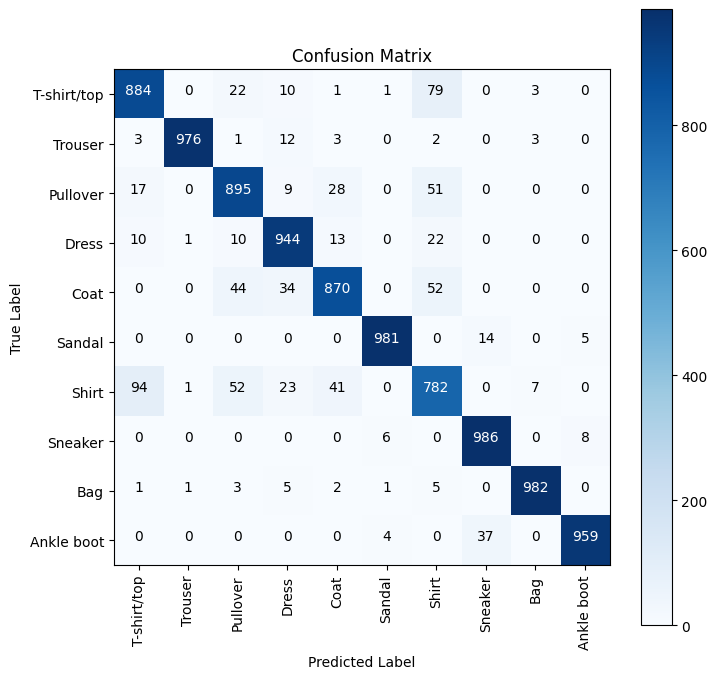

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the predictions of the model on the validation set
predictions = best_model_LR_kfold.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xticks(np.arange(10), class_names, rotation=90)
plt.yticks(np.arange(10), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.colorbar()

# Add text labels to the plot
thresh = cm.max() / 2.0
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()


In [39]:
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.90      0.88      1000
           3       0.91      0.94      0.93      1000
           4       0.91      0.87      0.89      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.78      0.78      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

